# Group Assignment

### 1. Import required libraries 

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [4]:
df = pd.read_csv('D:/frontend/groupAssignment2/renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [5]:
df.shape

(192544, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [7]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [8]:
df.isnull().sum()/len(df) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [9]:
len(df[df.duplicated()])

0

- We have no duplicate values

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [10]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [11]:
df=df.drop(['Unnamed: 0', 'user_id', 'item_id','review_text', 'review_summary','review_date'],axis=1)

In [12]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [13]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [14]:
df['weight']=pd.to_numeric(df['weight'].str.replace('lbs',''))

In [15]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. 

In [16]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [17]:
df['rented for'] = df['rented for'].replace(['party: cocktail'] , 'party')

In [18]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

- Above we have group 'party: cocktail' category with 'party'.

### 7.  The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. 

In [19]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [20]:
df['height']=df['height'].str.replace('"','')
df['height']

0         5' 8
1         5' 6
2         5' 4
3         5' 5
4         5' 9
          ... 
192539    5' 9
192540    5' 1
192541    5' 8
192542    5' 6
192543    5' 6
Name: height, Length: 192544, dtype: object

In [21]:
df["height"] = (df.height.str.split("'").str[0].astype(float) * 12) + (df.height.str.split("'").str[1].astype(float))
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [22]:
df.isnull().sum()

fit               0
bust size     18411
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

- There exist missing values and we will impute them appropriately

In [23]:
df[df == '?']=np.nan

## Now filling "NAN" with the most frequent value- the mode.
for col in ['bust size', 'weight','rating','rented for','body type','category','height','age']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
df.isnull().sum() 

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [25]:
df.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,136.240709,9.092758,65.306013,12.245175,33.856703
std,20.300468,1.429862,2.659925,8.494877,8.040513
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [26]:
df.describe(include='O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


- From the above statistical summary we can derive the following:-

- Weight: The average weight is approximately 116 lbs, with a standard deviation of around 54 lbs and maximum is 300. 

- Rating: The average rating is approximately 9.09, with a standard deviation of around 1.4 and maximum rating is 10..

- Height: The average height is approximately 65 inches, with a standard deviation of around 4.69 inches and maximum is 78 inches.

- Size: The average size is approximately 12.25, with a standard deviation of around 8.49 and the maximum is 58.

- Age: The average age is approximately 33.7 years, with a standard deviation of around 8.3 years and maximum age is 117 years.

### 10.  Are there outliers present in the column age? If yes, treat them with the appropriate method. 

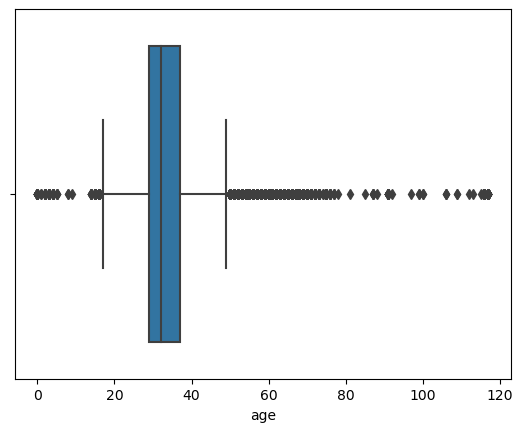

In [27]:
sns.boxplot(x=df['age'])
plt.show()

- outliers are present

<Axes: xlabel='age'>

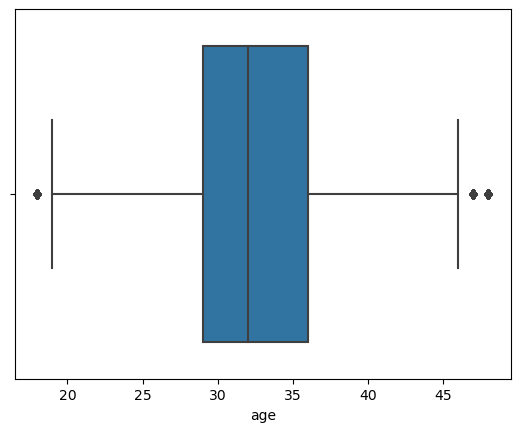

In [28]:
#IQR method
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1

lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)

df_out=df.loc[(df['age']<upper_whisker) & (df['age']>lower_whisker)]
sns.boxplot(x=df_out['age'],data=df)

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

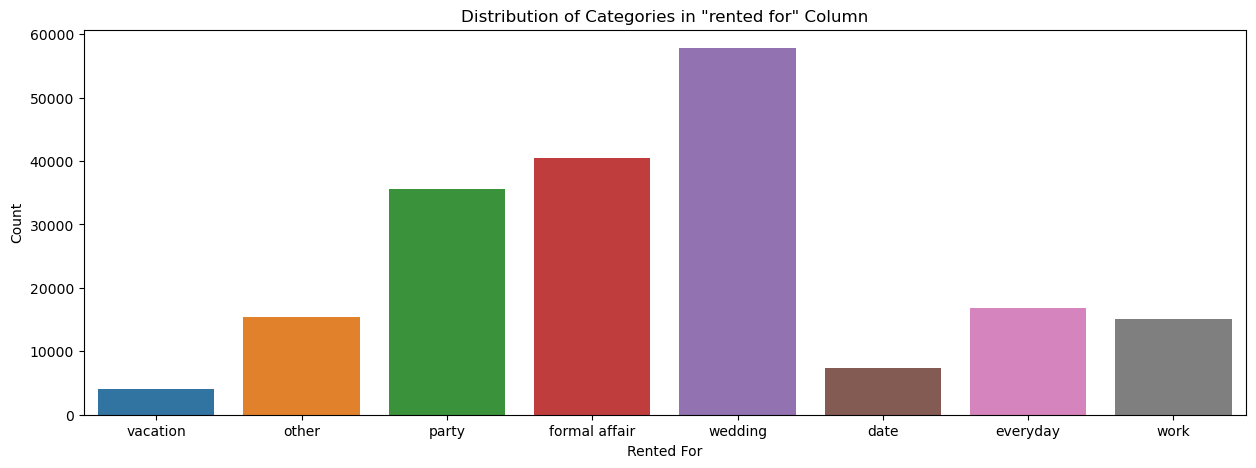

In [29]:
# Plotting the distribution of 'rented for' categories
plt.figure(figsize=(15,5))
sns.countplot(x= 'rented for', data=df)
plt.title('Distribution of Categories in "rented for" Column')
plt.xlabel('Rented For')
plt.ylabel('Count')
plt.show()

### 12. Encode the categorical variables in the dataset.

In [30]:
df.select_dtypes(include ='O') 

,fit,bust size,rented for,body type,category
0,fit,34d,vacation,hourglass,romper
1,fit,34b,other,straight & narrow,gown
2,fit,34b,party,hourglass,sheath
3,fit,34c,formal affair,pear,dress
4,fit,34b,wedding,athletic,gown
...,...,...,...,...,...
192539,fit,34dd,work,hourglass,jumpsuit
192540,fit,32c,work,petite,dress
192541,fit,36a,everyday,straight & narrow,dress
192542,fit,36c,wedding,pear,dress


In [31]:
cat_cols = ['fit', 'bust size', 'rented for','body type','category']

label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,130.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


In [32]:
# Assuming 'df' is your DataFrame and 'categorical_cols' is a list of categorical columns
df1 = pd.get_dummies(df, columns=cat_cols)
df1.head()

,weight,rating,height,size,age,fit_0,fit_1,fit_2,bust size_0,bust size_1,...,category_58,category_59,category_60,category_61,category_62,category_63,category_64,category_65,category_66,category_67
0,137.0,10.0,68.0,14,28.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132.0,10.0,66.0,12,36.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,10.0,64.0,4,116.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,135.0,8.0,65.0,8,34.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,145.0,10.0,69.0,12,27.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 13. Standardize the data, so that the values are within a particular range.

In [33]:
dfc = df.copy()
scaled_features = StandardScaler().fit_transform(dfc.values)
scaled_features_df= pd.DataFrame(scaled_features, index=dfc.index, columns=dfc.columns)

In [34]:
scaled_features_df.head(3)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.00464,0.037403,0.634498,0.514420,0.020953,1.569310,1.012808,0.206575,-0.728401
1,-0.556291,-0.18721,-0.208898,0.634498,-0.456753,1.927582,-0.307247,0.260905,-0.028862,0.266563
2,-0.556291,-0.18721,-0.307418,0.634498,0.028833,0.020953,1.647500,-0.490998,-0.970608,10.216203


### 14.  Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [35]:
#step1: Calculate co-variance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00000519e+00,  9.05525666e-03,  1.41240336e-02,
        -2.45044635e-01,  8.35378787e-03, -7.61016810e-03,
         3.35892077e-04,  1.06689491e-04,  6.54006939e-02,
         1.58535634e-03],
       [ 9.05525666e-03,  1.00000519e+00,  5.53905519e-01,
        -2.09457651e-02, -2.07814670e-03, -2.15702411e-01,
        -1.09647683e-02,  1.47008395e-01,  6.27115858e-01,
         1.65407124e-01],
       [ 1.41240336e-02,  5.53905519e-01,  1.00000519e+00,
        -2.09651667e-02,  9.19429998e-03, -2.29920750e-01,
        -1.34802562e-02,  3.43259194e-01,  6.99741338e-01,
         6.62728926e-02],
       [-2.45044635e-01, -2.09457651e-02, -2.09651667e-02,
         1.00000519e+00,  1.27900970e-02,  4.72965534e-03,
        -2.37071846e-02,  1.83477352e-03, -3.67286881e-02,
        -3.51431810e-02],
       [ 8.35378787e-03, -2.07814670e-03,  9.19429998e-03,
         1.27900970e-02,  1.00000519e+00, -9.08626233e-03,
        -5.76351186e-02, -1.71578033e-02,  4.87422452e-03,
        -3.

In [36]:
#step2: Calculate the Eigenvalues and eigen vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values:' ,'\n',eig_values )
print('\n')
print('Eigen Vectors:' ,'\n',eig_vectors )

Eigen Values: 
 [2.52493549 0.27697816 0.42218014 1.24880734 0.75207088 1.08438514
 1.01784218 0.83970319 0.94538657 0.88776284]


Eigen Vectors: 
 [[ 3.87894005e-02  5.53183099e-02 -3.32114733e-02  6.88572310e-01
   6.93798792e-01 -1.75453988e-01  5.46370149e-02  6.43578854e-02
  -3.03579609e-02  3.29042458e-03]
 [ 4.98804724e-01  1.67099042e-01 -7.75886015e-01 -1.93729980e-02
  -4.81577171e-02  7.43896264e-02 -1.84713041e-01  2.54930497e-01
   1.60300095e-02 -1.16956948e-01]
 [ 5.38842215e-01  6.35928071e-01  5.04826984e-01 -5.10785111e-02
  -3.55306138e-02 -7.26232363e-02  8.19917027e-02  5.47350116e-02
  -1.14359254e-02 -1.77198638e-01]
 [-3.72084470e-02  7.73291643e-03  5.08118461e-04 -7.00062034e-01
   7.03641448e-01  4.46663284e-02 -4.04770903e-02  8.95098664e-02
   2.33800566e-02 -3.41352822e-02]
 [-5.26612876e-04 -1.66832497e-03 -1.51932242e-02 -4.60607128e-02
  -2.66465939e-02 -5.98081600e-01 -3.71754835e-01 -2.22026921e-01
   6.68366107e-01 -7.08661461e-02]
 [-2.56482879e-01

In [37]:
#step3 Scree plot
total=sum(eig_values)
var_exp= [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained Variance', var_exp)
print('\n')
print('Cumulative Variance Explained',cum_var_exp )

Explained Variance [25.24922379836374, 12.488008576639817, 10.843795062938824, 10.178368938948573, 9.453816643812852, 8.877582339656646, 8.39698830305561, 7.520669692800666, 4.221779455552759, 2.769767188230526]


Cumulative Variance Explained [ 25.2492238   37.73723238  48.58102744  58.75939638  68.21321302
  77.09079536  85.48778366  93.00845336  97.23023281 100.        ]


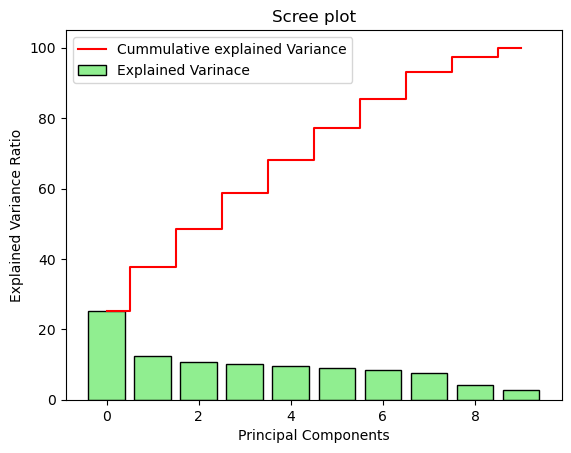

In [38]:
## Scree plot
plt.bar(range(10),var_exp, align='center',color='lightgreen',edgecolor='black',label='Explained Varinace')
plt.step( range(10),cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc = 'best')
plt.title('Scree plot')
plt.show()

- We can see from the above Scree plot that first 8 principal components explain about 90-95% of variation so we can choose optimal number of pincipal components as 8

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 
- Find the optimal K Value using elbow plot for K Means clustering.
- Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
- Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [39]:
pca=PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.241978,-0.873031,0.136433,-1.319411,1.384901,0.516983,0.374214,-0.093038
1,-0.650177,-0.724328,0.446601,0.290006,-0.842567,1.639858,0.532610,-0.119467
2,0.439357,0.388240,6.296402,5.737490,0.997298,-1.785468,5.342765,-1.301338
3,-0.538631,0.178795,0.347027,0.002704,-1.168309,0.310588,0.025849,0.935139
4,0.660684,-1.202050,-1.447910,-0.938148,0.521175,-0.849224,0.628934,0.009763


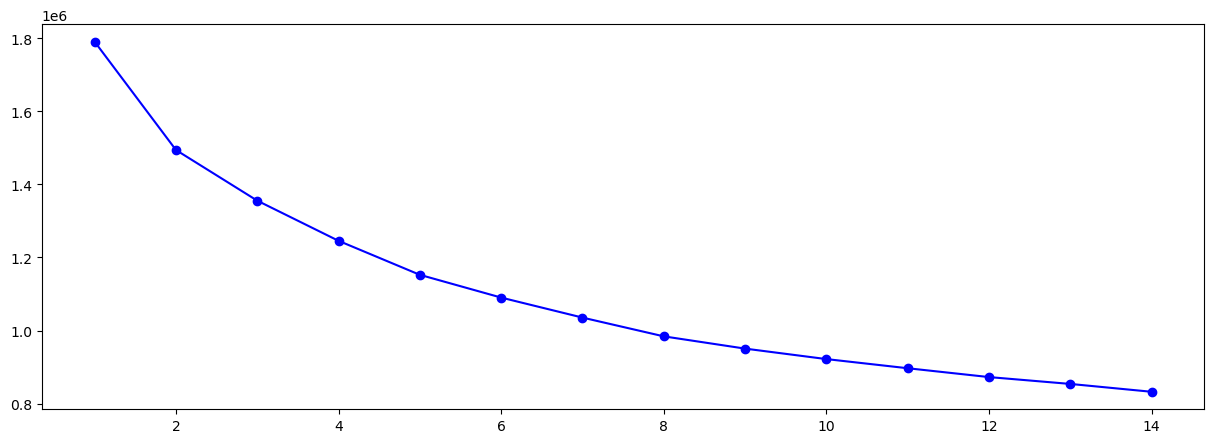

In [40]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o',color='b')
plt.show()

- from the above plot optimal k value is k=2

In [41]:
# Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=2,n_init=15, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=2, n_init=15, random_state=100)

In [42]:
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 0])

In [43]:
# Creating a dataframe of labels.
label_df = pd.DataFrame(kmeans.labels_, columns=list(['Label']))

In [44]:
# Joining the label dataframe to pca_df dataframe
kmeans_df = pca_df.join(label_df)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,0.241978,-0.873031,0.136433,-1.319411,1.384901,0.516983,0.374214,-0.093038,1
1,-0.650177,-0.724328,0.446601,0.290006,-0.842567,1.639858,0.532610,-0.119467,1
2,0.439357,0.388240,6.296402,5.737490,0.997298,-1.785468,5.342765,-1.301338,0
3,-0.538631,0.178795,0.347027,0.002704,-1.168309,0.310588,0.025849,0.935139,1
4,0.660684,-1.202050,-1.447910,-0.938148,0.521175,-0.849224,0.628934,0.009763,0


In [45]:
kmeans_df['Label'].value_counts()

1    117202
0     75342
Name: Label, dtype: int64

In [76]:
kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i,silhouette_score(pca_df,labels))

2 0.37757369289149256
3 0.3448274036988369
4 0.27370620049979494
5 0.2536555129670592
6 0.247389381775436
7 0.2488832001779246
8 0.23523197869207377
9 0.24264795957757715
10 0.2383416390183509
11 0.22112887534541575
12 0.21786290533708258
13 0.2216462538747949
14 0.21171228148308405


- Above from elbow plot we chose optimal K value as 2 and we built a Kmeans clustering model.
- From the silhoutte score we can observe the for clusters 2 and 3 the score is higher. We can build Kmeans clustering model using the optimal K value as either 2 or 3.

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 
- Find the optimal K Value using dendrogram for Agglomerative clustering.
- Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
- Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [46]:
dfc2 = dfc.sample(n=40000)

In [48]:
dfc2.shape

(40000, 10)

In [49]:
dfc2.reset_index(inplace=True,drop=True)

In [50]:
dfc2.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,37,118.0,6.0,3,6,1,65.0,8,30.0
1,0,38,140.0,10.0,1,0,32,67.0,16,35.0
2,0,38,120.0,10.0,4,1,44,64.0,8,41.0
3,0,65,155.0,10.0,7,0,45,68.0,28,54.0
4,0,52,145.0,10.0,4,3,45,68.0,14,34.0


In [ ]:
plt.figure(figsize=[18,7])
merg = linkage(dfc2, method='ward') 
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

### 17.  Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)


-----
## Happy Learning
-----